# TP NOTÉ OLIVIER LÉONIE ESN by UM 

In [1]:
import os
import subprocess

# Demander à l'utilisateur d'entrer son username et sa clé API
kaggle_username = input("Entrez votre nom d'utilisateur Kaggle : ")
kaggle_key = input("Entrez votre clé API Kaggle : ")

# Configurer les variables d'environnement pour Kaggle
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

# Télécharger le jeu de données à partir de Kaggle
try:
    # Nom du dataset sur Kaggle
    dataset = "srisaisuhassanisetty/fake-job-postings"
    
    # Télécharger et décompresser le dataset
    subprocess.run(['kaggle', 'datasets', 'download', '-d', dataset, '--unzip'], check=True)
    
    print(f"Le jeu de données '{dataset}' a été téléchargé et décompressé avec succès.")
except Exception as e:
    print(f"Erreur lors du téléchargement ou de la décompression du jeu de données : {e}")


Entrez votre nom d'utilisateur Kaggle :  lonieolivier
Entrez votre clé API Kaggle :  5fe160a17111d46924e6ca40db10ba0c


Dataset URL: https://www.kaggle.com/datasets/srisaisuhassanisetty/fake-job-postings
License(s): CC0-1.0


  0%|          | 0.00/702k [00:00<?, ?B/s]


Le jeu de données 'srisaisuhassanisetty/fake-job-postings' a été téléchargé et décompressé avec succès.


100%|██████████| 702k/702k [00:01<00:00, 563kB/s]


In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Charger le jeu de données
df = pd.read_csv('Fake Postings.csv')

# 1. Introduction au nettoyage des données
# Les données brutes collectées contiennent souvent du bruit (caractères spéciaux, liens, mentions inutiles) qui doit être nettoyé avant leur utilisation dans des modèles NLP.

# 2. Nettoyage des textes : suppression des caractères inutiles
def nettoyer_texte(texte):
    # Supprimer les caractères spéciaux et hyperliens
    texte = re.sub(r'http\S+', '', texte)
    texte = re.sub(r'[^A-Za-z0-9\s]+', '', texte)
    
    # Convertir les textes en minuscules
    texte = texte.lower()
    
    # Supprimer les espaces inutiles et normaliser le format
    texte = re.sub(r'\s+', ' ', texte).strip()
    
    return texte

df['cleaned_text'] = df['description'].apply(nettoyer_texte)

# 3. Tokenisation et normalisation
nltk.download('punkt')
nltk.download('wordnet')

def tokeniser_et_normaliser(texte):
    tokens = word_tokenize(texte)
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens, stemmed_tokens, lemmatized_tokens

df['tokens'], df['stemmed_tokens'], df['lemmatized_tokens'] = zip(*df['cleaned_text'].apply(tokeniser_et_normaliser))

# 4. Sauvegarde des données nettoyées
df.to_csv('fake_job_postings_cleaned.csv', index=False)
print("Les données nettoyées ont été sauvegardées dans 'fake_job_postings_cleaned.csv'.")
df_cleaned = pd.read_csv('fake_job_postings_cleaned.csv')
print(df_cleaned)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leoolivier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leoolivier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Les données nettoyées ont été sauvegardées dans 'fake_job_postings_cleaned.csv'.
                                             title  \
0                              Mental health nurse   
1                        Conference centre manager   
2                                   Engineer, land   
3                          Forest/woodland manager   
4     Production designer, theatre/television/film   
...                                            ...   
9995                           Designer, furniture   
9996                Therapist, speech and language   
9997                             Therapist, sports   
9998                   Clinical research associate   
9999                           Hospital pharmacist   

                                            description  \
0     Arm drive court sure vote. Earn $5000/week! Im...   
1     Government whom its bed go tax tree black. Ear...   
2     I member discuss follow way there nation. Earn...   
3     House across wait approach f

In [4]:
# Garder seulement les 4 dernières colonnes
df_last_4_columns = df_cleaned.iloc[:, -4:]

# Sauvegarder le nouveau DataFrame dans un fichier CSV
df_last_4_columns.to_csv('fake_job_postings_last_4_columns.csv', index=False)

print("Les 4 dernières colonnes ont été sauvegardées dans 'fake_job_postings_last_4_columns.csv'.")
df_last_4_columns = pd.read_csv('fake_job_postings_last_4_columns.csv')
print(df_last_4_columns)

Les 4 dernières colonnes ont été sauvegardées dans 'fake_job_postings_last_4_columns.csv'.
                                           cleaned_text  \
0     arm drive court sure vote earn 5000week immedi...   
1     government whom its bed go tax tree black earn...   
2     i member discuss follow way there nation earn ...   
3     house across wait approach face earn 5000week ...   
4     case best environmental full finally leader me...   
...                                                 ...   
9995  worry own pressure stuff together room propert...   
9996  enter bit thing certainly earn 5000week immedi...   
9997  visit goal under boy earn 5000week immediate h...   
9998  walk money letter few earn 5000week immediate ...   
9999  other left tv each reveal earn 5000week immedi...   

                                                 tokens  \
0     ['arm', 'drive', 'court', 'sure', 'vote', 'ear...   
1     ['government', 'whom', 'its', 'bed', 'go', 'ta...   
2     ['i', 'member', '


Mots les plus fréquents :
now             10062
at              10050
contact         10000
earn            10000
5000week        10000
immediate       10000
hiring          10000
prepare            83
all                77
relationship       76
seem               76
energy             76
stage              75
more               75
pretty             74
suddenly           74
lead               74
executive          73
involve            73
phone              73
dtype: int64


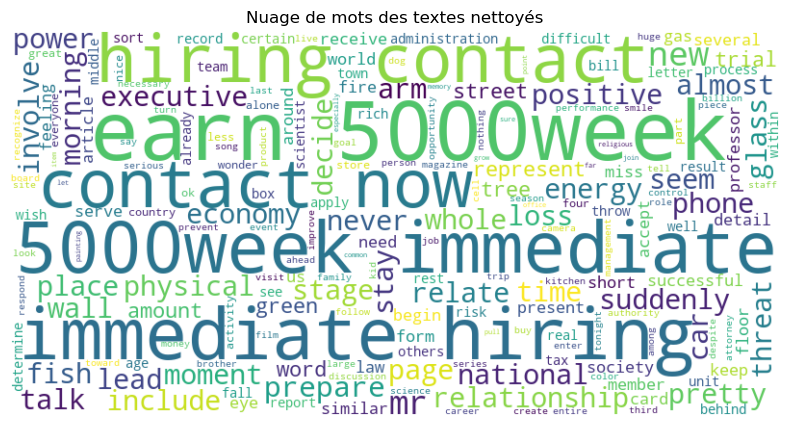

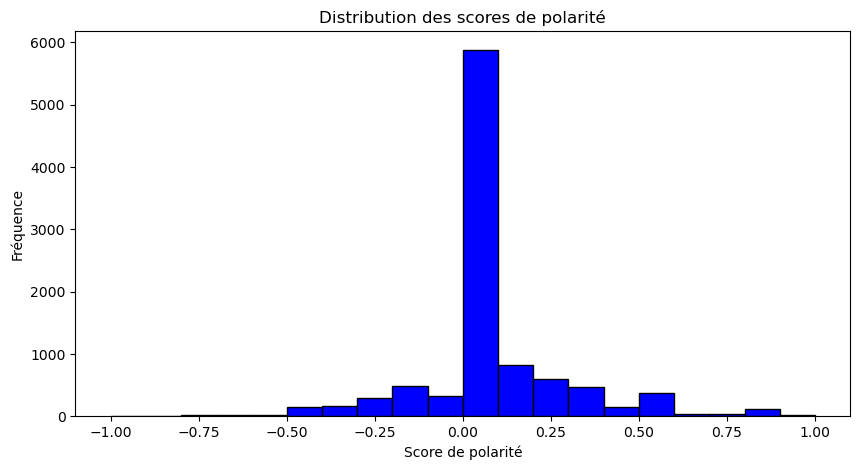

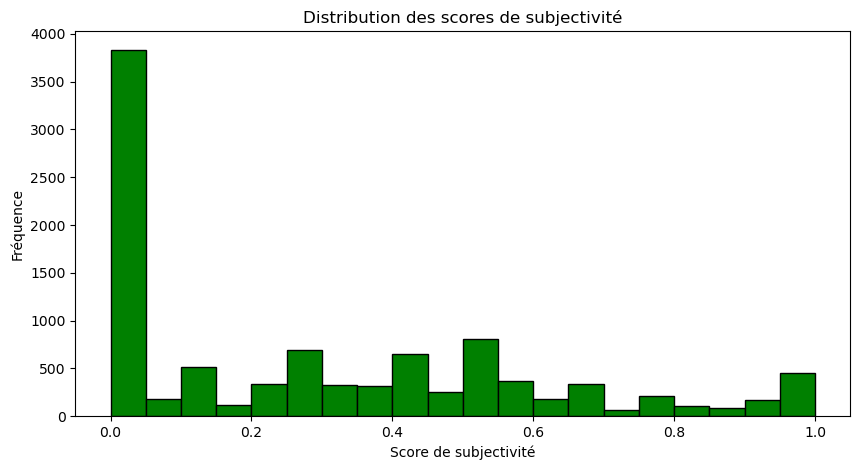

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# 1. Exploration statistique : 
# Identifier les mots les plus fréquents en utilisant la colonne 'cleaned_text'
all_words = ' '.join(df_last_4_columns['cleaned_text'])
word_freq = pd.Series(all_words.split()).value_counts()

# Afficher les mots les plus fréquents
print("\nMots les plus fréquents :")
print(word_freq.head(20))

# 2. Visualisation
# Générer un nuage de mots pour visualiser les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des textes nettoyés')
plt.show()

# 3. Analyse de sentiments
# Appliquer une fonction d’analyse de sentiment sur les tokens pour obtenir un score de polarité et de subjectivité
def analyse_sentiment(tokens):
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df_last_4_columns['sentiment'] = df_last_4_columns['tokens'].apply(lambda x: analyse_sentiment(eval(x)))

# Séparer les scores de polarité et de subjectivité
df_last_4_columns['polarity'] = df_last_4_columns['sentiment'].apply(lambda x: x[0])
df_last_4_columns['subjectivity'] = df_last_4_columns['sentiment'].apply(lambda x: x[1])

# Visualiser la distribution des scores de polarité à l’aide d’un histogramme
plt.figure(figsize=(10, 5))
plt.hist(df_last_4_columns['polarity'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution des scores de polarité')
plt.xlabel('Score de polarité')
plt.ylabel('Fréquence')
plt.show()

# Visualiser la distribution des scores de subjectivité à l’aide d’un histogramme
plt.figure(figsize=(10, 5))
plt.hist(df_last_4_columns['subjectivity'], bins=20, color='green', edgecolor='black')
plt.title('Distribution des scores de subjectivité')
plt.xlabel('Score de subjectivité')
plt.ylabel('Fréquence')
plt.show()

In [6]:
# Sélection des tokens avec les scores de polarité les plus élevés et les moins élevés
most_positive_tokens = df_last_4_columns.loc[df_last_4_columns['polarity'].idxmax(), 'tokens']
most_negative_tokens = df_last_4_columns.loc[df_last_4_columns['polarity'].idxmin(), 'tokens']

print("\nTokens avec le score de polarité le plus élevé :")
print(most_positive_tokens)

print("\nTokens avec le score de polarité le moins élevé :")
print(most_negative_tokens)


Tokens avec le score de polarité le plus élevé :
['there', 'yes', 'best', 'fact', 'decision', 'economy', 'police', 'earn', '5000week', 'immediate', 'hiring', 'contact', 'now', 'at', 'richard86gmailcom']

Tokens avec le score de polarité le moins élevé :
['memory', 'contain', 'garden', 'experience', 'very', 'base', 'beat', 'artist', 'earn', '5000week', 'immediate', 'hiring', 'contact', 'now', 'at', 'nhendersonhotmailcom']
